In [ ]:
# Implement multivariable linear regression & KNN Regression in the given dataset. 
# Check the accuracy,mse,mae of both algorithms & make a barplot using these things.

In [34]:
import pandas as pd
import numpy as np
import seaborn as sb
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from pandas.core.dtypes.common import is_numeric_dtype
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings("ignore")

# Data Analysis

In [2]:
ps = pd.read_excel('insurance.xlsx')

In [3]:
ps.head()

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
ps.info

<bound method DataFrame.info of       age  gender     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

In [7]:
ps.isnull().sum()

age         0
gender      0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
ps.dtypes

age           int64
gender       object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [11]:
ps.nunique()

age           47
gender         2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [12]:
ps.gender.unique()

array(['female', 'male'], dtype=object)

In [13]:
ps.smoker.unique()

array(['yes', 'no'], dtype=object)

In [14]:
ps.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

# Label Encoding

In [15]:
le = LabelEncoder()

In [16]:
for col in ps.columns:
    if (not is_numeric_dtype(ps[col])):
        ps[col] = le.fit_transform(ps[col])

In [17]:
ps.head()

,age,gender,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [20]:
ps.describe()

,age,gender,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


<Axes: >

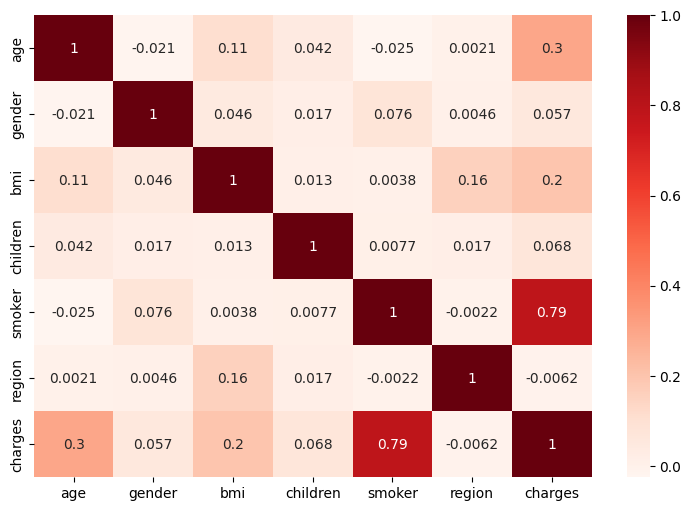

In [33]:
plt.figure(figsize=(9,6))
sb.heatmap(ps.corr(), annot=True, cmap="Reds")

In [35]:
p = ps.drop('charges',axis=1)
s = ps['charges']

In [36]:
ptrain, ptest, strain, stest = tts(p, s, test_size=0.3, random_state=69)

# Linear Regression (LR)

In [37]:
lr = LinearRegression()

In [38]:
lr.fit(ptrain, strain)

LinearRegression()

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [51]:
m = lr.coef_
m

array([  247.99405241,  -263.21862068,   358.67074589,   530.17301393,
       23703.8079267 ,  -401.31233835])

In [52]:
c = lr.intercept_
c

-12389.580526740285

In [40]:
lr_pred = lr.predict(ptest)

In [41]:
lr_score = lr.score(ptest,stest)
lr_score

0.7350574034928785

In [43]:
c = lr.intercept_
c

-12389.580526740285

In [44]:
lr_mae = mean_absolute_error(stest, lr_pred)
lr_mae

4521.65073402933

In [45]:
lr_mse = mean_squared_error(stest, lr_pred)
lr_mse

42872211.4117399

# KNN Regressor

In [46]:
knnr = KNeighborsRegressor(n_neighbors=5)

In [48]:
knnr.fit(ptrain, strain)

KNeighborsRegressor()

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook. 
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [49]:
knnr_pred = knnr.predict(ptest)

In [50]:
knnr_score = knnr.score(ptest,stest)
knnr_score

0.05006532850415224

In [53]:
knnr_mae = mean_absolute_error(stest, knnr_pred)
knnr_mae

8699.964491362189

In [54]:
knnr_mse = mean_squared_error(stest, knnr_pred)
knnr_mse

153715561.78818154

# Bar Plot

In [65]:
data = {'Name':['LR_accuracy','LR_mae','LR_mse', 'KNNR_accuracy','KNNR_mae','KNNR_mse'],
   'Accuracy':[lr_score,lr_mae,lr_mse, knnr_score,knnr_mae,knnr_mse]}

In [67]:
ps_updated = pd.DataFrame(data=data)
ps_updated

,Name,Accuracy
0,LR_accuracy,7.350574e-01
1,LR_mae,4.521651e+03
2,LR_mse,4.287221e+07
3,KNNR_accuracy,5.006533e-02
4,KNNR_mae,8.699964e+03
5,KNNR_mse,1.537156e+08


<Axes: xlabel='Accuracy', ylabel='Name'>

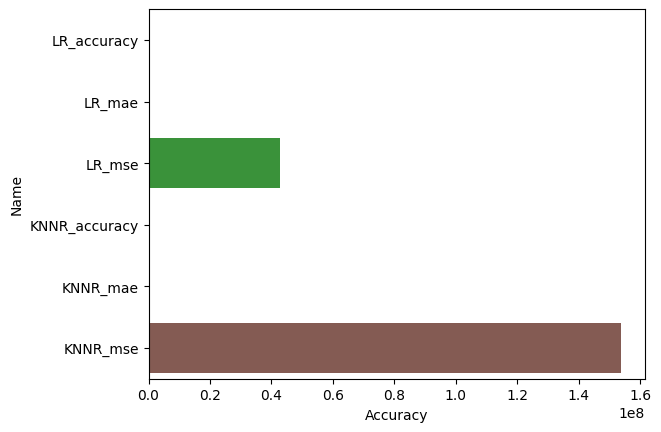

In [71]:
sb.barplot(x='Accuracy',y='Name',data=ps_updated)